# ROC curves vs. precision-recall curves

## Variations in machine learning evaluation with imbalanced classification datasets

This is a simple demonstration of the sensitivity of receiver operating characteristic curves against precision-recall curves when applied to classification datasets for machine learning application using imbalanced classes. The area under the curve (AUC) tends to favor ROC when classes are perfectly balanced, but things fall apart in more likely scenarios when classes, binary or multiclass, aren't so symmetrical.

Thanks to [Dr. Jason Brownlee (@TeachTheMachine)](https://twitter.com/TeachTheMachine) from [Mastering Machine Learning][https://machinelearningmastery.com] for [the inspiration](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) for this repo.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

## Receiver Operating Characteristic (ROC) curves

### setup data and learning algorithm

In [114]:
# make a synthetic 2-class dataset with balanced classes
X_balanced, y_balanced = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=2)

# split the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.5, random_state=2)

# fit a kNN model to the training data for learning
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# compute the probabilities of predictions for ONLY the positive class
probabilities = model.predict_proba(X_test)[:, 1]

''' 
***
ALTERNATIVELY... 
***
probabilities_decision_function = model.decision_function(X_test)[:, 1]
'''

# compute the ROC data - false positive rate, true positive rate & thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities, pos_label=1)
model_auc = auc(fpr, tpr)

In [115]:
print(fpr)
print(tpr)
print(thresholds)
print('AUC: {:.3f}'.format(model_auc))

[0.         0.0060241  0.03413655 0.15662651 1.        ]
[0.         0.8187251  0.98804781 0.99800797 1.        ]
[2.         1.         0.66666667 0.33333333 0.        ]
AUC: 0.992


### visualize the distribution of classes

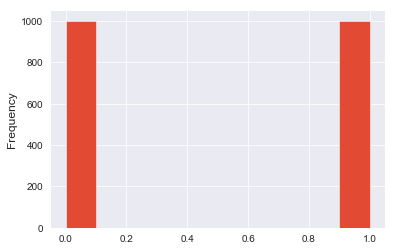

In [116]:
targets = pd.Series(y_balanced)
targets.plot.hist()

# sns.distplot(targets)

### visualizing the ROC curve & AUC

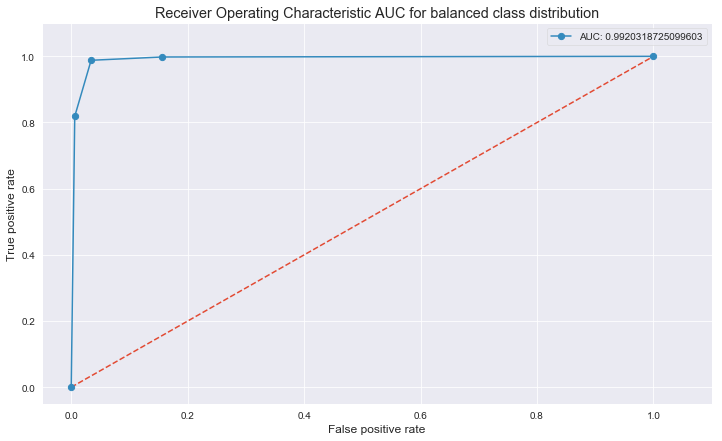

In [117]:
plt.figure(figsize=(12,7))

# plot a model with no-skill (doens't classify random data points as the positive class)
plt.plot([0,1], [0,1], linestyle='--')

# plot the ROC curve for the model
plt.plot(fpr, tpr, marker='.', markersize=12.5, label='AUC: {}'.format(model_auc))
plt.xlim([-0.05,1.1])
plt.ylim([-0.05, 1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic AUC for balanced class distribution')
plt.legend(loc='best')
plt.show()

# imbalanced class distribution

In [134]:
# make a synthetic 2-class dataset with imbalanced classes
X_imbalanced, y_imbalanced = make_classification(n_samples=2000, n_classes=2, weights=[0.9,0.09], random_state=24)

# split the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, test_size=0.5, random_state=42)

# fit a kNN model to the training data for learning
model_imbalanced = KNeighborsClassifier(n_neighbors=3)
model_imbalanced.fit(X_train, y_train)

# compute the probabilities of predictions for ONLY the positive class
probabilities_imbalanced = model_imbalanced.predict_proba(X_test)[:, 1]

# do the same analysis as above, but for an imbalanced class distribution, using precision-recall methods
y_predictions = model_imbalanced.predict(X_test)

# compute precision-recall curve
precision, recall, thresholds_imbalanced = precision_recall_curve(y_test, probabilities_imbalanced)

# compute the F1 score (harmonic mean between precision & recall)
score = f1_score(y_test, y_predictions)

# compute the precision-recall AUC
pr_auc = auc(recall, precision)

# average precision score
mean_precision_score = average_precision_score(y_test, probabilities_imbalanced)

print('F1 score: {:.3f} | AUC: {:.3f} | Average precision score: {:.3f}'.format(score, pr_auc, mean_precision_score))

### visualize the class distribution

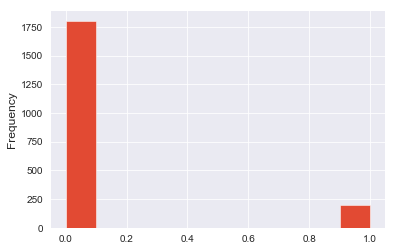

In [140]:
targets_imbalanced = pd.Series(y_imbalanced)
targets_imbalanced.plot.hist()

### visualize the precision-recall AUC

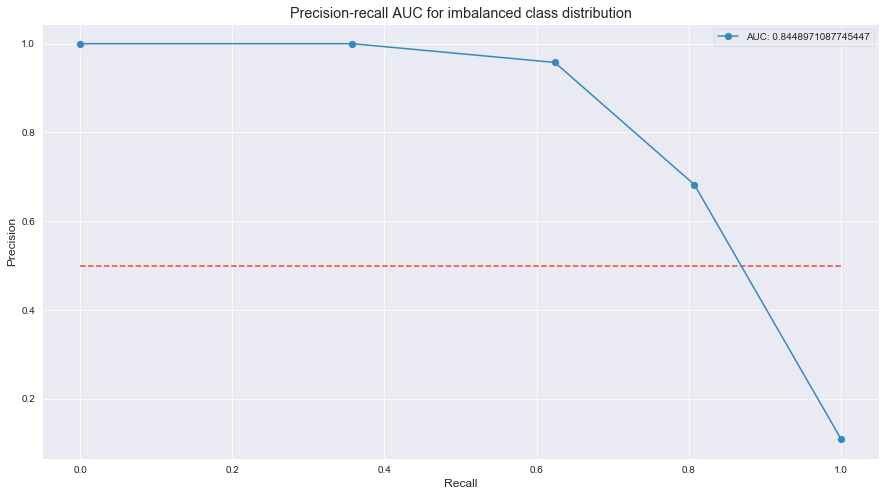

In [137]:
plt.figure(figsize=(15, 8))

# plot a line for a no-skill model
plt.plot([0,1], [0.5, 0.5], linestyle='--')

# plot the ROC model
plt.plot(recall, precision, marker='.', markersize=12.5, label='AUC: {}'.format(pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall AUC for imbalanced class distribution')
plt.legend(loc='best')
plt.show()